<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,**
**Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of**
**future coronary heart disease (CHD). The dataset provides the patients’ information. It includes**
**over 4,000 records and 15 attributes.**
**Variables**
**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk**
**factors.**

**Data Description**
**Demographic:**

**• Sex: male or female("M" or "F")**

**• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to**
**whole numbers, the concept of age is continuous)**

**Behavioral**

**• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**

**• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be**
**considered continuous as one can have any number of cigarettes, even half a cigarette.)**

**Medical( history)**

**• BP Meds: whether or not the patient was on blood pressure medication (Nominal)**

**• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)**

**• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)**

**• Diabetes: whether or not the patient had diabetes (Nominal)**

**Medical(current)**

**• Tot Chol: total cholesterol level (Continuous)**

**• Sys BP: systolic blood pressure (Continuous)**

**• Dia BP: diastolic blood pressure (Continuous)**

**• BMI: Body Mass Index (Continuous)**

**• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in**
**fact discrete, yet are considered continuous because of large number of possible values.)**

**• Glucose: glucose level (Continuous)**

**Predict variable (desired target)**

**• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0”** **means “No”)**

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

from sklearn.utils import resample
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report


In [ ]:
pip install Boruta

In [ ]:
from boruta import BorutaPy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# saving data from csv to dataframe
data = pd.read_csv("/content/drive/MyDrive/Almabetter/capstone project 3/data_cardiovascular_risk.csv")

In [ ]:
# checking the data columns and values for some rows
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#information of the data
data.info

<bound method DataFrame.info of         id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0        0   64        2.0   F  ...    NaN       90.0     80.0           1
1        1   36        4.0   M  ...  29.77       72.0     75.0           0
2        2   46        1.0   F  ...  20.35       88.0     94.0           0
3        3   50        1.0   M  ...  28.26       68.0     94.0           1
4        4   64        1.0   F  ...  26.42       70.0     77.0           0
...    ...  ...        ...  ..  ...    ...        ...      ...         ...
3385  3385   60        1.0   F  ...  29.28       70.0    103.0           0
3386  3386   46        1.0   F  ...  21.96       80.0     84.0           0
3387  3387   44        3.0   M  ...  28.92       73.0     72.0           1
3388  3388   60        1.0   M  ...  23.01       80.0     85.0           0
3389  3389   54        3.0   F  ...  29.88       79.0     92.0           0

[3390 rows x 17 columns]>

In [ ]:
# to get idea on the data related statistics
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# name of columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# checking if data contains null values
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# replacing null values with most frequent values in case of nominal, categorical variable

data['education'].fillna(data['education'].mode()[0],inplace=True)
data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0],inplace=True)
data['BPMeds'].fillna(data['BPMeds'].mode()[0],inplace=True)

# replacing null values with mean of the values in case of numerical variable

data['totChol'].fillna(data['totChol'].mean(),inplace=True)
data['BMI'].fillna(data['BMI'].mean(),inplace=True)
data['heartRate'].fillna(data['heartRate'].mean(),inplace=True)
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [ ]:
# again checking if null values are totally removed or not
data.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# checking how many patients were on  blood pressure medication
data['BPMeds'].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
# checking different Body mass index values for patients
data['BMI'].value_counts()

22.910000    17
22.540000    16
22.190000    15
25.794964    14
23.480000    12
             ..
18.380000     1
22.940000     1
28.390000     1
34.040000     1
30.780000     1
Name: BMI, Length: 1260, dtype: int64

In [ ]:
# checking total cholesterol values for different patients

data['totChol'].value_counts()

240.0    65
210.0    51
220.0    48
260.0    46
232.0    45
         ..
354.0     1
363.0     1
380.0     1
124.0     1
367.0     1
Name: totChol, Length: 241, dtype: int64

In [ ]:
# checking heart rate values for different patients

data['heartRate'].value_counts()

75.000000     442
80.000000     298
70.000000     241
85.000000     191
72.000000     184
             ... 
97.000000       1
75.977279       1
45.000000       1
140.000000      1
143.000000      1
Name: heartRate, Length: 69, dtype: int64

In [ ]:
# checking glucose values for all patients

data['glucose'].value_counts()

82.08652     304
75.00000     149
83.00000     135
70.00000     123
77.00000     122
            ... 
225.00000      1
191.00000      1
147.00000      1
274.00000      1
163.00000      1
Name: glucose, Length: 133, dtype: int64

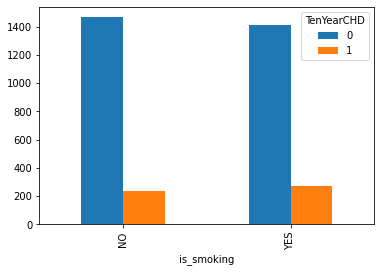

In [ ]:
# plotting graph for checking how many users are smoking or not and how it affects the target variable

pd.crosstab(data['is_smoking'],data['TenYearCHD']).plot(kind='bar')

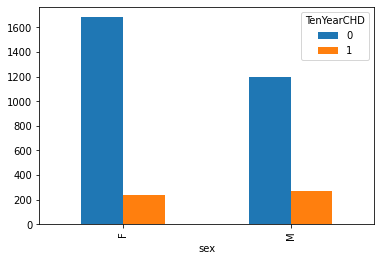

In [ ]:
# plotting graph for checking how many persons are male or female and how it affects the target variable

pd.crosstab(data['sex'],data['TenYearCHD']).plot(kind='bar')

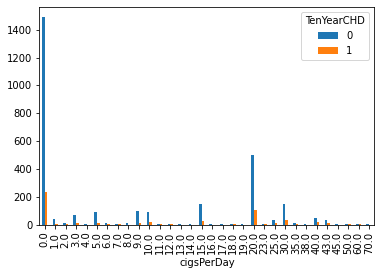

In [ ]:
# plotting graph for checking the cigarettes per day values and how it affects the target variable

pd.crosstab(data['cigsPerDay'],data['TenYearCHD']).plot(kind='bar')

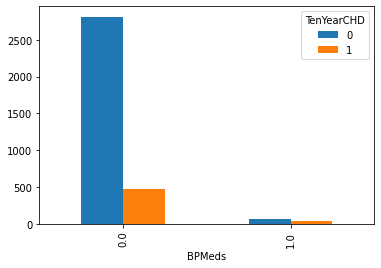

In [ ]:
# plotting graph for checking  whether  patient was on blood pressure medication or not and how it affects the target variable

pd.crosstab(data['BPMeds'],data['TenYearCHD']).plot(kind='bar')

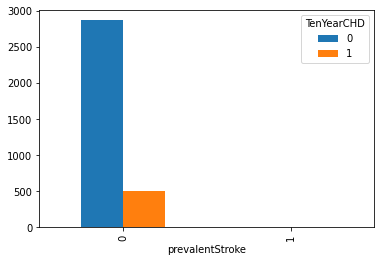

In [ ]:
# plotting graph for checking  whether or not the patient had previously had a stroke and how it affects the target variable

pd.crosstab(data['prevalentStroke'],data['TenYearCHD']).plot(kind='bar')

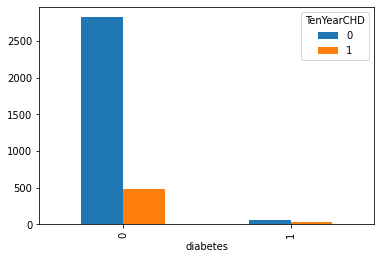

In [ ]:
# plotting graph for checking if person is diabetic or not and how it affects the target variable

pd.crosstab(data['diabetes'],data['TenYearCHD']).plot(kind='bar')

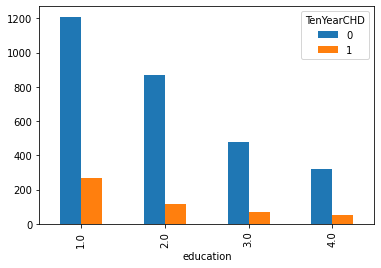

In [ ]:
# plotting graph for checking the education values and how it affects the target variable

pd.crosstab(data['education'],data['TenYearCHD']).plot(kind='bar')

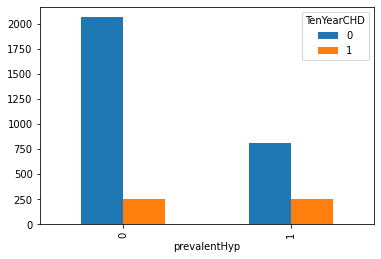

In [ ]:
# plotting graph for checking whether or not the patient was hypertensive and how it affects the target variable

pd.crosstab(data['prevalentHyp'],data['TenYearCHD']).plot(kind='bar')

In [ ]:
# checking data after making required changes
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
# Replacing string categorical value with numerical value 0 or 1

data['sex'] = data['sex'].replace({'F':1,'M':0})
data['is_smoking'] = data['is_smoking'].replace({'YES':1,'NO':0})

In [ ]:
# checking data again after changes 

data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
# columns of dataframe
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# 
train,test=train_test_split(data,test_size=0.2,random_state=0)

In [ ]:
independent_variables = ['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
dependent_variables = ['TenYearCHD']       
train_independent = train[independent_variables]
train_dependent =  train[dependent_variables]

In [ ]:
train_independent.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2134,54,1.0,1,0,0.0,0.0,0,0,0,272.0,146.0,95.0,23.66,72.0,80.0
1161,37,2.0,0,1,9.0,0.0,0,0,0,237.0,102.0,72.0,19.68,67.0,83.0
137,39,1.0,0,1,43.0,0.0,0,1,0,291.0,177.5,100.0,25.74,67.0,91.0
2170,55,1.0,1,0,0.0,0.0,0,0,0,225.0,136.5,85.5,20.56,60.0,90.0
2876,59,2.0,0,0,0.0,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0


In [ ]:
train_dependent.head()

,TenYearCHD
2134,0
1161,0
137,0
2170,0
2876,1


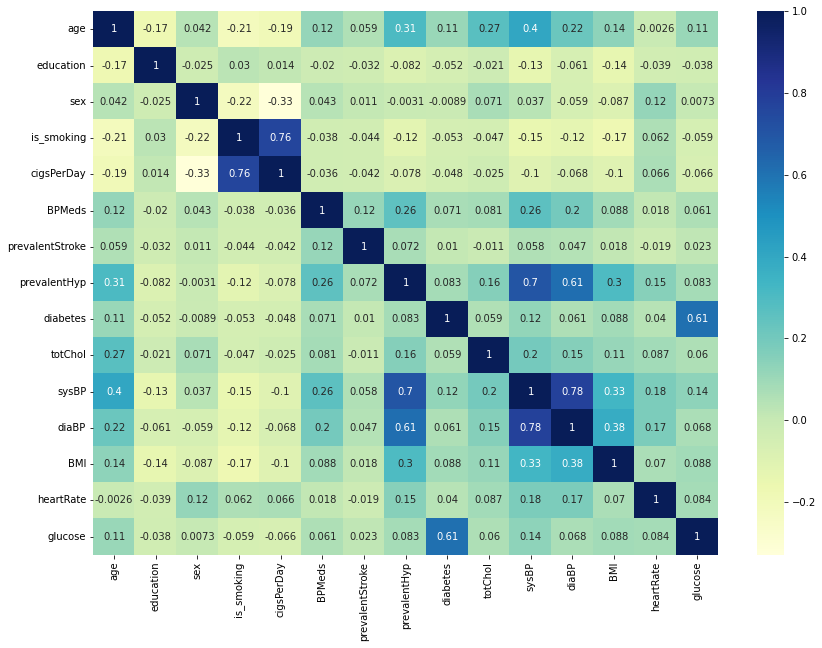

In [ ]:
correlation_calc = data[independent_variables].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="YlGnBu")

#**Random Forest Classifier**

In [ ]:
rf_all_features = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_all_features.fit(train_independent, train_dependent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(test[dependent_variables], rf_all_features.predict(test[independent_variables]))

0.8392330383480826

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(train_independent), np.array(train_dependent))  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	27 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	28 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	29 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	30 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	31 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	32 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	33 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	34 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	35 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	36 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	8


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	37 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	38 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	39 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	40 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	41 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	42 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	43 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	44 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	45 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	46 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	47 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	48 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	49 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	50 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	51 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	52 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	53 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	54 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	55 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	56 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	57 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	58 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	59 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	60 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	61 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	62 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	63 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	64 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	65 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	66 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	67 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	68 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	69 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	70 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	71 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	72 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	73 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	74 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	75 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	76 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	77 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	78 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	79 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	80 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	81 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	82 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	83 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	84 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	85 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	86 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	87 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	88 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	89 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	90 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	91 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	92 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	93 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	94 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	95 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	96 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	97 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	98 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	99 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	9


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=69, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FAE92075C00,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='au

In [ ]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_)

Ranking:  [ 1  8  6 10  4 11  8  3  6  1  1  1  2  5  1]
No. of significant features:  5


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(train_independent.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking') 

,Feature,Ranking
0,age,1
9,totChol,1
10,sysBP,1
11,diaBP,1
14,glucose,1
12,BMI,2
7,prevalentHyp,3
4,cigsPerDay,4
13,heartRate,5
2,sex,6


In [ ]:
test_independent = test[independent_variables]
X_important_train = boruta_selector.transform(np.array(train_independent))
X_important_test = boruta_selector.transform(np.array(test_independent)) 

In [ ]:
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf_boruta.fit(X_important_train, train[dependent_variables]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(test[dependent_variables], rf_boruta.predict(X_important_test))

0.8362831858407079

In [ ]:
metrics.precision_score(test[dependent_variables], rf_boruta.predict(X_important_test))

0.18181818181818182

In [ ]:
metrics.f1_score(test[dependent_variables], rf_boruta.predict(X_important_test))

0.03478260869565218

In [ ]:
data.shape

(3390, 17)

In [ ]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]
target1.shape

(511, 17)

**Resampling to balance dataset as with unbalanced dataset we are getting good accuracy score but precision and F1 Score value are not as expected**

In [ ]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)


In [ ]:
target=pd.concat([target0,target1])

In [ ]:
target['TenYearCHD'].value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [ ]:
target.shape

(5758, 17)

In [ ]:
train,test=train_test_split(target,test_size=0.2,random_state=0)

In [ ]:
train.shape

(4606, 17)

In [ ]:
test.shape

(1152, 17)

In [ ]:
train_independent = train[independent_variables]
train_dependent =  train[dependent_variables]

**Now fitting or training Random Forest Classifier on balanced data**

In [ ]:
rf_all_features = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=10)
rf_all_features.fit(train_independent, train_dependent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(test[dependent_variables], rf_all_features.predict(test[independent_variables]))

0.8767361111111112

In [ ]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(train_independent), np.array(train_dependent))  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	0


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	27 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	28 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	29 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	30 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	31 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	32 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	33 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	34 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	35 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	36 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	37 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	38 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	39 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	40 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	41 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	42 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	43 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	44 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	45 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	46 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	47 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	48 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	49 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	50 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	51 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	52 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	53 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	54 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	55 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	56 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	57 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	58 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	59 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	60 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	61 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	62 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	63 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	64 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	65 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	66 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	67 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	68 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	69 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	70 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	71 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	72 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	73 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	74 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	75 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	76 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	77 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	78 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	79 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	80 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	81 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	82 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	83 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	84 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	85 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	86 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	87 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	88 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	89 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	90 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	91 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	92 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	93 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	94 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	95 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	96 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	97 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	98 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


/usr/local/lib/python3.7/dist-packages/boruta/boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	99 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	1


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	1


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=105, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FAE92075E20,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

In [ ]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_)

Ranking:  [1 1 1 1 1 2 3 1 1 1 1 1 1 1 1]
No. of significant features:  13


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(train_independent.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking') 

,Feature,Ranking
0,age,1
1,education,1
2,sex,1
3,is_smoking,1
4,cigsPerDay,1
7,prevalentHyp,1
8,diabetes,1
9,totChol,1
10,sysBP,1
11,diaBP,1


In [ ]:
test_independent = test[independent_variables]
X_important_train = boruta_selector.transform(np.array(train_independent))
X_important_test = boruta_selector.transform(np.array(test_independent)) 
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=10)
rf_boruta.fit(X_important_train, train[dependent_variables]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(test[dependent_variables], rf_boruta.predict(X_important_test))

0.8871527777777778

In [ ]:
metrics.precision_score(test[dependent_variables], rf_boruta.predict(X_important_test))

0.8719211822660099

In [ ]:
metrics.f1_score(test[dependent_variables], rf_boruta.predict(X_important_test))

0.8909395973154361

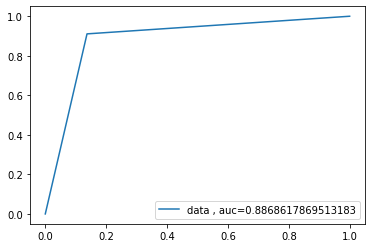

In [ ]:

fpr, tpr, threshold = metrics.roc_curve(test[dependent_variables], rf_boruta.predict(X_important_test))
auc = metrics.roc_auc_score(test[dependent_variables], rf_boruta.predict(X_important_test))
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

#**K Neighbour Classifier**

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [ ]:
m2 = 'KNeighborsClassifier'
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

model = knn.fit(train[independent_variables], train[dependent_variables])
knn_predict = knn.predict(test_independent)
knn_conf_matrix = confusion_matrix(test[dependent_variables], knn_predict)
knn_acc_score = accuracy_score(test[dependent_variables], knn_predict)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selec

In [ ]:
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test[dependent_variables], knn_predict))

confussion matrix
[[485  84]
 [  2 581]]


Accuracy of k-NN Classification: 92.53472222222221 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       569
           1       0.87      1.00      0.93       583

    accuracy                           0.93      1152
   macro avg       0.93      0.92      0.92      1152
weighted avg       0.93      0.93      0.92      1152



In [ ]:
accuracy_score(test[dependent_variables],knn_predict)

0.9253472222222222

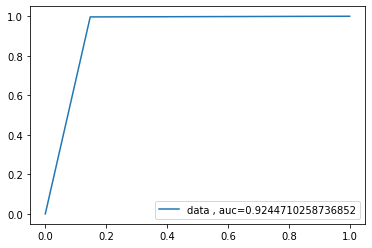

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(test[dependent_variables], knn_predict)
auc = metrics.roc_auc_score(test[dependent_variables],knn_predict)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()